<a href="https://colab.research.google.com/github/MuhammadHatta72/machine-learning-semester5/blob/main/meet4/Tugas_Meet04_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####Nama : Muhammad Hatta
####Kelas : 3A-TI
####Mata Kuliah : Machine Learning

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara.

Akurasi: 0.9763406940063092
              precision    recall  f1-score   support

      female       0.96      0.99      0.98       297
        male       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Confusion Matrix:
 [[293   4]
 [ 11 326]]


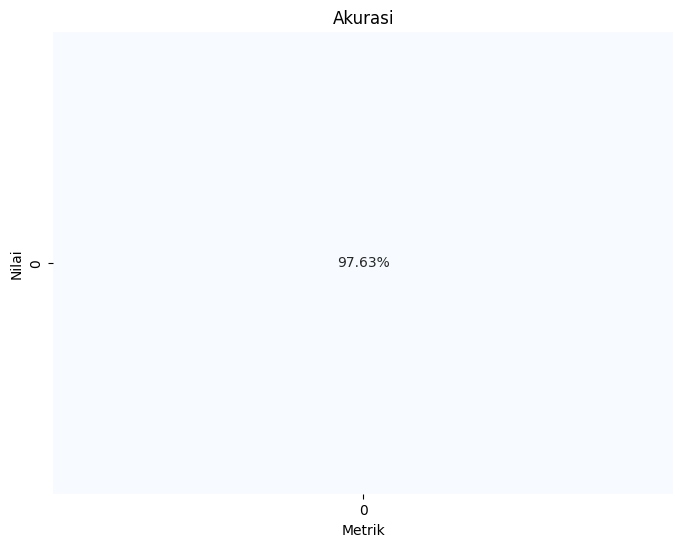

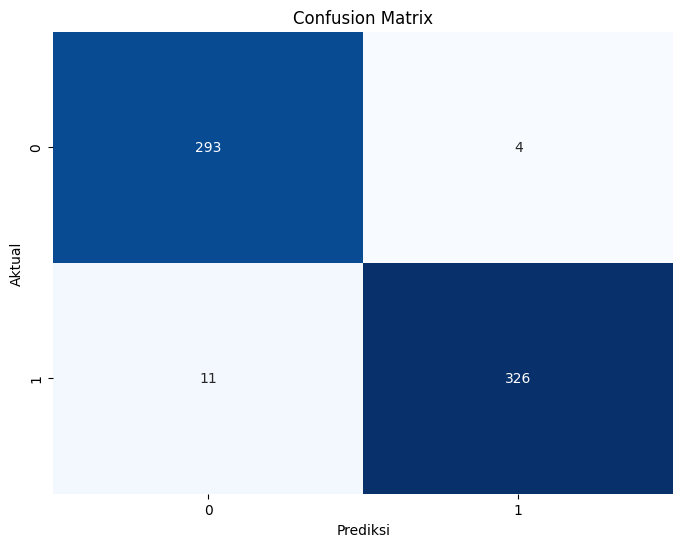

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Impor data
data = pd.read_csv('/content/drive/MyDrive/Machine Learning-Semester 5/Pratikum4/voice.csv')

# Pisahkan fitur dan label
X = data.drop('label', axis=1)  # Fitur
y = data['label']              # Label

# Bagi Data menjadi Data Latih dan Data Uji:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalakan Fitur-fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inisialisasi Model SVM
svm_classifier = SVC(kernel='linear', C=1)

# Latih Model SVM
svm_classifier.fit(X_train, y_train)

# Evaluasi Model
y_pred = svm_classifier.predict(X_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Report Klasifikasi
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi Akurasi
plt.figure(figsize=(8, 6))
sns.heatmap([[accuracy]], annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Akurasi')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.show()

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan, Menggunakan data spam.csv
Fitur CountVectorizer dengan mengaktifkan stop_words
Evaluasi hasilnya

Akurasi: 0.9838565022421525
Laporan Klasifikasi:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
 [[959   6]
 [ 12 138]]


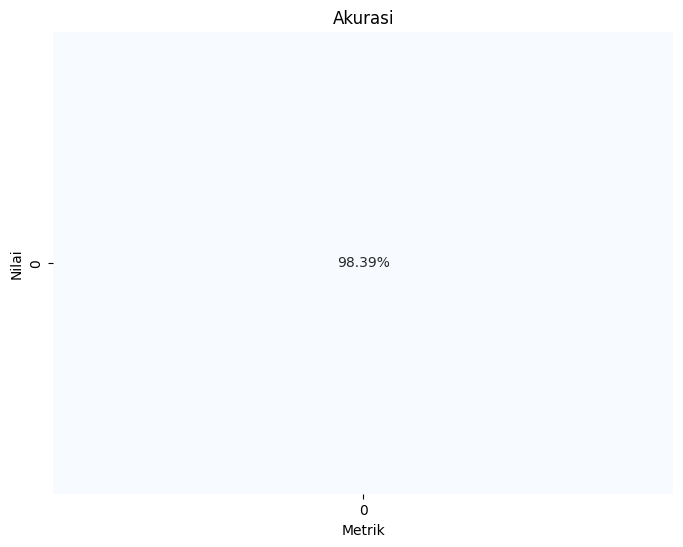

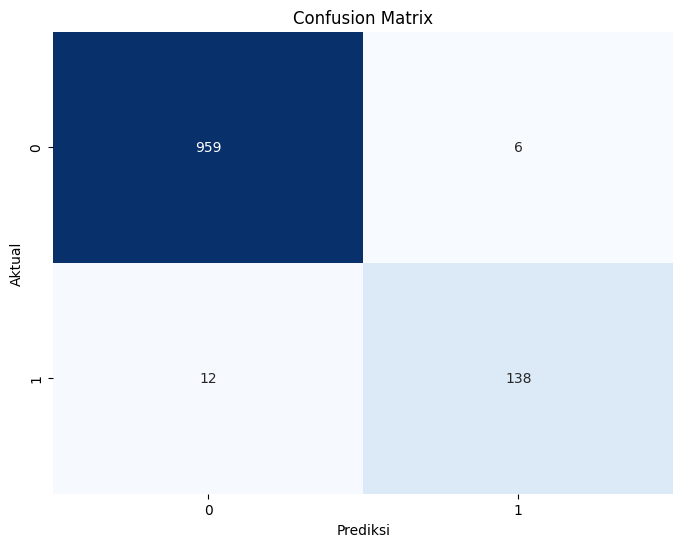

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Muat data spam.csv
data = pd.read_csv('/content/drive/MyDrive/Machine Learning-Semester 5/Pratikum4/spam.csv', encoding='latin-1')

# Bagi data menjadi data latih dan data uji
X = data['v2']
y = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan konfigurasi CountVectorizer dengan stop words
vectorizer = CountVectorizer(stop_words='english')

# Transformasi teks menjadi vektor fitur
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Inisialisasi model klasifikasi Multinomial Naive Bayes
nb_classifier = MultinomialNB()

# Latih model
nb_classifier.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = nb_classifier.predict(X_test)

# Evaluasi hasilnya
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:", accuracy)

# Laporan Klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi:\n", classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualisasi Akurasi
plt.figure(figsize=(8, 6))
sns.heatmap([[accuracy]], annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Akurasi')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.show()

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan, Menggunakan data spam.csv
Fitur TF-IDF dengan mengaktifkan stop_words
Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

Akurasi dengan TF-IDF: 0.9668161434977578
Laporan Klasifikasi dengan TF-IDF:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Confusion Matrix dengan TF-IDF:
 [[965   0]
 [ 37 113]]


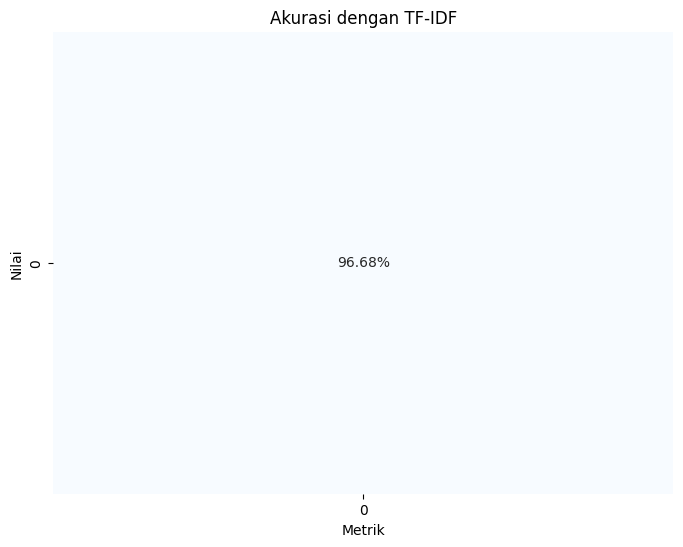

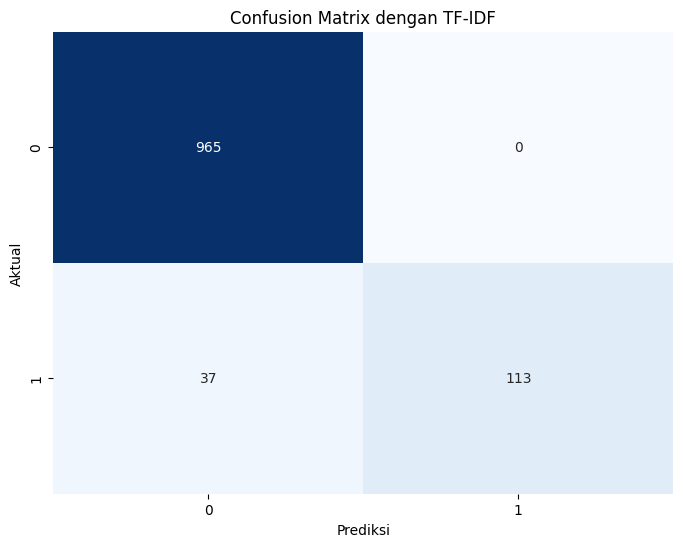

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Muat data spam.csv
data = pd.read_csv('/content/drive/MyDrive/Machine Learning-Semester 5/Pratikum4/spam.csv', encoding='latin-1')

# Bagi data menjadi data latih dan data uji
X = data['v2']
y = data['v1']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan konfigurasi TfidfVectorizer dengan stop words
vectorizer = TfidfVectorizer(stop_words='english')

# Transformasi teks menjadi vektor fitur TF-IDF
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Inisialisasi model klasifikasi Multinomial Naive Bayes
nb_classifier = MultinomialNB()

# Latih model
nb_classifier.fit(X_train, y_train)

# Lakukan prediksi pada data uji
y_pred = nb_classifier.predict(X_test)

# Evaluasi hasilnya
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi dengan TF-IDF:", accuracy)

# Laporan Klasifikasi
classification_rep = classification_report(y_test, y_pred)
print("Laporan Klasifikasi dengan TF-IDF:\n", classification_rep)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix dengan TF-IDF:\n", conf_matrix)

# Visualisasi Akurasi
plt.figure(figsize=(8, 6))
sns.heatmap([[accuracy]], annot=True, fmt='.2%', cmap='Blues', cbar=False)
plt.title('Akurasi dengan TF-IDF')
plt.xlabel('Metrik')
plt.ylabel('Nilai')
plt.show()

# Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title('Confusion Matrix dengan TF-IDF')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

###Perbandingan:

* Fitur CountVectorizer dengan mengaktifkan stop words lebih sederhana dan hanya menghitung frekuensi kemunculan kata dalam dokumen.
*Fitur TF-IDF dengan mengaktifkan stop words memberikan bobot yang lebih besar pada kata-kata yang relatif jarang muncul dalam dokumen tetapi muncul dalam beberapa dokumen, sehingga dapat membantu menangkap kata-kata yang lebih informatif.

####Pilihan antara CountVectorizer dan TF-IDF tergantung pada tugas klasifikasi dan data yang digunakan:

* Jika data memiliki banyak kata-kata yang muncul dalam berbagai dokumen tetapi tidak informatif (misalnya, stop words), CountVectorizer dengan mengaktifkan stop words dapat cukup efektif.
* Jika Anda ingin memberikan bobot lebih besar pada kata-kata yang jarang muncul tetapi informatif, TF-IDF dapat lebih baik.

